- A PDF can have any shape. It just has to be singularly-valued, nonnegative, and the total area under the PDF must be equal to one.
- The probability is given by the area under the PDF

- Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
- Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
- Hit submit to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

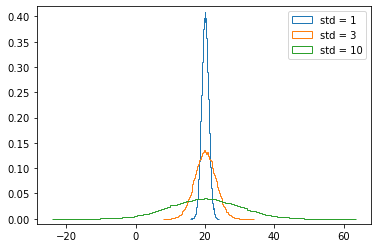

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 =  np.random.normal(20, 3, size = 100000)
samples_std10 =  np.random.normal(20, 10, size = 100000)

# Make histograms
_ = plt.hist(samples_std1, density=True , histtype='step', bins = 100)
_ = plt.hist(samples_std3, density=True , histtype='step', bins = 100)
_ = plt.hist(samples_std10, density=True , histtype='step', bins = 100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


- Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
- Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).
- Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


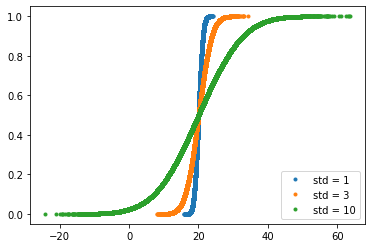

In [8]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1 , marker = ".", linestyle = "none")
_ = plt.plot(x_std3, y_std3 , marker = ".", linestyle = "none")
_ = plt.plot(x_std10, y_std10 , marker = ".", linestyle = "none")

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


- Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [19]:
import pandas as pd
data = pd.read_csv("belmont.csv", parse_dates=True)
print(data.columns)
belmont_no_outliers = np.array(data.Time)

Index(['Year', 'Winner', 'Jockey', 'Trainer', 'Owner', 'Time', 'Track',
       'miles'],
      dtype='object')


In [21]:
# # Compute mean and standard deviation: mu, sigma
# mu = np.mean(belmont_no_outliers)
# sigma = np.std(belmont_no_outliers)

# # Sample out of a normal distribution with this mu and sigma: samples
# samples = np.random.normal(mu, sigma, size = 10000)

# # Get the CDF of the samples and of the data
# x_theor, y_theor = ecdf(samples)
# x, y = ecdf(belmont_no_outliers)

# # Plot the CDFs and show the plot
# _ = plt.plot(x_theor, y_theor)
# _ = plt.plot(x, y, marker='.', linestyle='none')
# _ = plt.xlabel('Belmont winning time (sec.)')
# _ = plt.ylabel('CDF')
# plt.show()


- Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.

In [22]:
mu = 149.22101123595507
sigma = 1.627816471774816

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/ len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000653


How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.
- Exponential


Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.
- Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

- Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
- Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
- Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
- The function returns the sum of the waiting times for the two events.

In [24]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size = size)

    return t1 + t2

- Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.
- Label the axes.
- Show your plot.

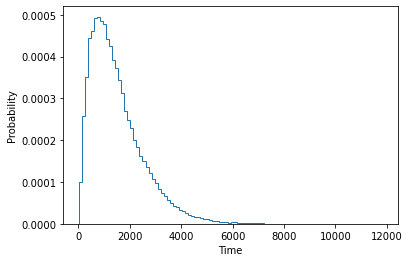

In [26]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size = 100000) 

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True,  histtype='step')


# Label axes
plt.xlabel("Time")
plt.ylabel("Probability")

# Show the plot
plt.show()
